### Oktoberfest Beer Data

a) Read the provided "Oktoberfest.csv" into a pandas dataframe.

In [1]:
import pandas as pd
df = pd.read_csv("Oktoberfest.csv")

b) Which attributes does the dataset have?

In [2]:
print(df.columns)
df.head(10)

Index(['Year', 'Duration', 'Visitors_Total', 'Visitors_Daily', 'Beer_Price',
       'Beer_Consumption'],
      dtype='object')


,Year,Duration,Visitors_Total,Visitors_Daily,Beer_Price,Beer_Consumption
0,1985,16,7.1,444,3.20,54541
1,1986,16,6.7,419,3.30,53807
2,1987,16,6.5,406,3.37,51842
3,1988,16,5.7,356,3.45,50951
4,1989,16,6.2,388,3.60,51241
5,1990,16,6.7,419,3.77,54300
6,1991,16,6.4,400,4.21,54686
7,1992,16,5.9,369,4.42,48888
8,1993,16,6.5,406,4.71,51933
9,1994,16,6.6,413,4.89,52108


c) What was the price of a beer in 1995? Locate the value using .loc

In [3]:
x = df.loc[df["Year"]==1995, "Beer_Price"]
print(x)  # x.iloc[0]

10    5.15
Name: Beer_Price, dtype: float64


d) Based on the dataset, when did the city of Munich first record the beer price?

In [4]:
first_year_recorded = df["Year"].min()
print(first_year_recorded)

1985


e) What is the value range of the attribute "Visitors_Total"?

In [5]:
v_min = df["Visitors_Total"].min()
v_max = df["Visitors_Total"].max()
print("Value Range for Visitors_Total:", v_min, " - ", v_max)

Value Range for Visitors_Total: 5.5  -  7.1


f) Plot the beer consumption over the years.

<AxesSubplot:xlabel='Year'>

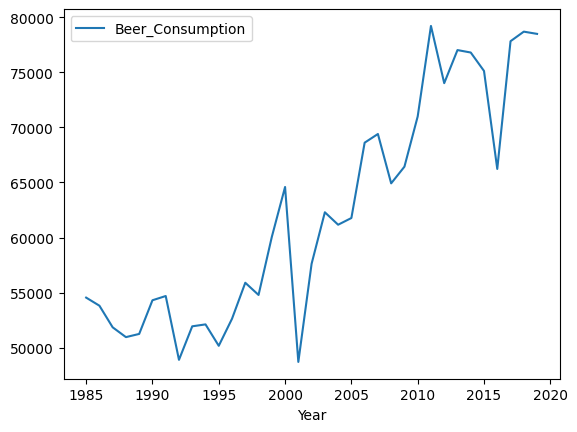

In [6]:
df.plot(x = "Year", y = "Beer_Consumption")

g) Create a scatterplot that shows the number of visitors per year. Calculate an
appropriate statistic to validate or reject the explanation, that increased
beer consumption is driven by increase in total visitors.

correlation = -0.033


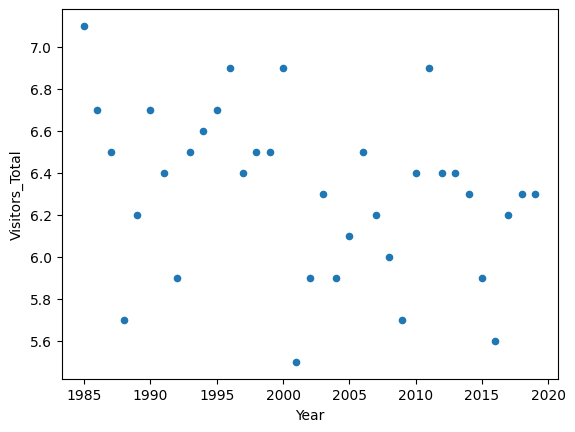

In [7]:
df.plot.scatter(x = "Year", y = "Visitors_Total")
print("correlation =", round(df["Visitors_Total"].corr(df["Beer_Consumption"]), 3))

# Alternatively, compute full correlation matrix
# df.corr() 

The correlation of Visitors_Total and Beer_Consumption is almost zero, and even
slightly negative, which suggests that the increase in Beer_Consumption over the 
years is not due to an increase in Visitors_Total.

h) Compute the mean and the variance of "Beer_Price" during the period from 2000 to 2007

In [8]:
# We construct a bit-mask first
mask = (2000 <= df["Year"]) & (df["Year"] <= 2007)
mean = df[mask]["Beer_Price"].mean()
var = df[mask]["Beer_Price"].var()
print("mean =", mean)
print("var =", var)

mean = 6.97
var = 0.24900000000000003


Add a new column to the dataframe describing the difference of beer prices
between 2 consecutive years. Plot this difference against "Year"

<AxesSubplot:xlabel='Year'>

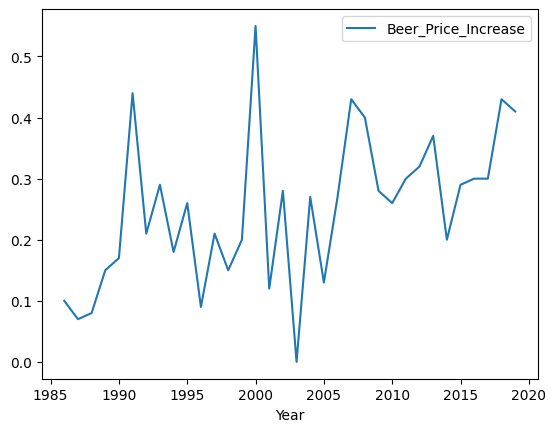

In [9]:
df["Beer_Price_Increase"] = df["Beer_Price"] - df["Beer_Price"].shift(1)
df.plot(x="Year", y="Beer_Price_Increase")